<a href="https://colab.research.google.com/github/Gaurangg1404/learning-AI-ML/blob/main/tensorflow_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)


In [3]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


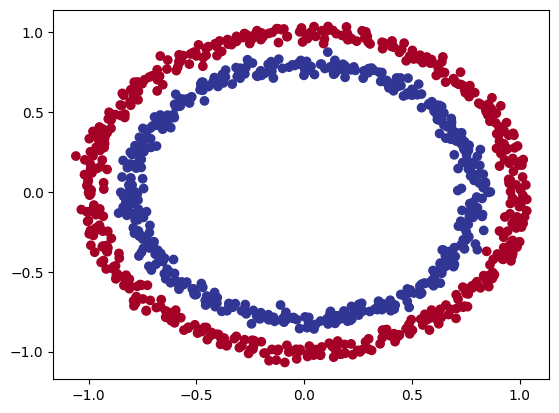

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap = plt.cm.RdYlBu);

In [7]:
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
len(x), len(y)

(1000, 1000)

In [10]:
x[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

In [11]:
import tensorflow as tf

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 9ms/step - loss: 4.4123 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 3.6959 - accuracy: 0.5040
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 1.1676 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7219 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.4990


In [13]:
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5050


[0.6993187665939331, 0.5049999952316284]

In [19]:
import numpy as np

In [20]:
def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min, y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
       print("doing multiclass classification")
       y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
      print("doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


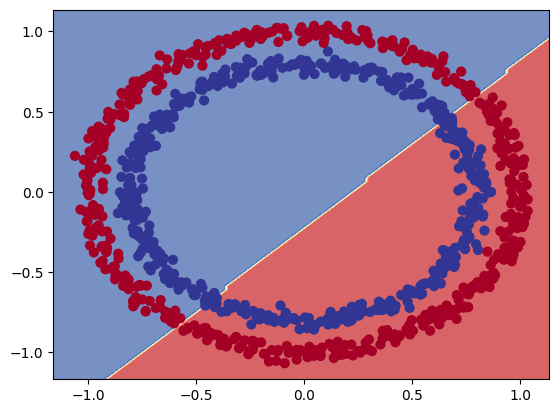

In [21]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

In [22]:
tf.random.set_seed(42)

x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#model_3.fit(x_reg_train, y_reg_train, epochs=100)

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 417.6560 - mae: 417.6560
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 305.6436 - mae: 305.6436
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 196.2237 - mae: 196.2237
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 81.2458 - mae: 81.2458
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 65.2876 - mae: 65.2876
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 90.1324 - mae: 90.1324
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 65.7578 - mae: 65.7578
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6031 - mae: 43.6031
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.2240 - mae: 49.2240
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6024 - mae: 41.6024
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


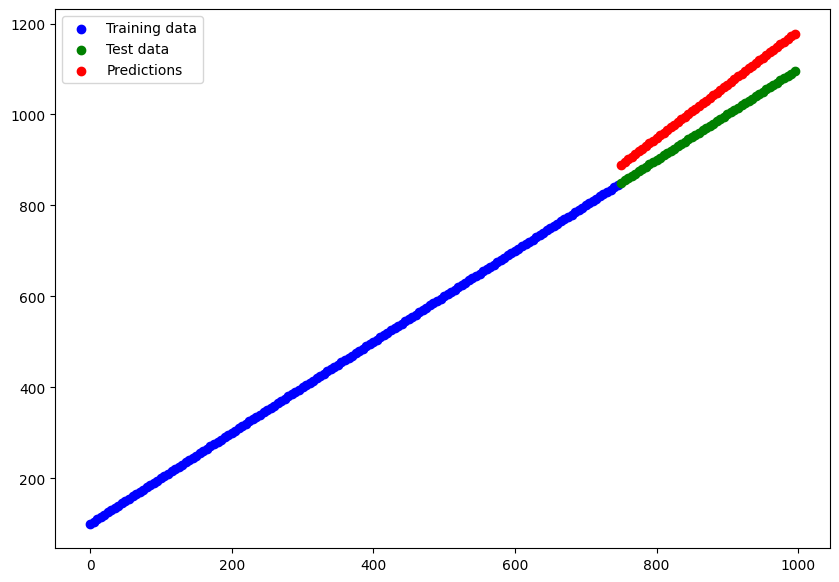

In [24]:
y_reg_preds= model_3.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g",label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r",label="Predictions")
plt.legend();

In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2967 - accuracy: 0.4620
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2147 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1678 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1215 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0865 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0792 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0755 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0727 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0700 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0096 - accuracy: 0.4660
Epoch 11/

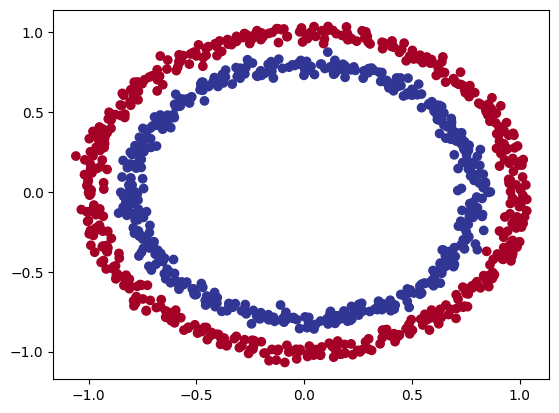

In [26]:
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


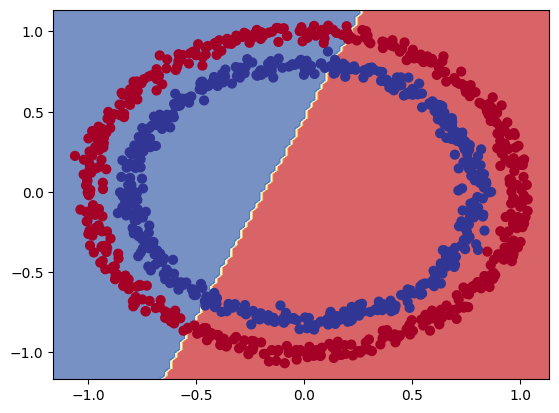

In [27]:
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

In [28]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4303 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3891 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3132 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2690 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2305 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1925 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1858 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1735 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1171 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1004 - accuracy: 0.4810
Epoch 11/

In [29]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history=model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [30]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


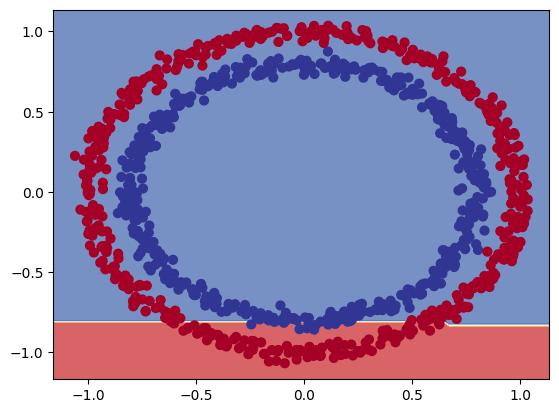

In [31]:
plot_decision_boundary(model_6, x, y)

In [32]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7187 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4540
Epoch 11/

In [33]:
model_7.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.5620


[0.6587002277374268, 0.5619999766349792]

313/313 [==============================] - 1s 2ms/step
doing binary classification


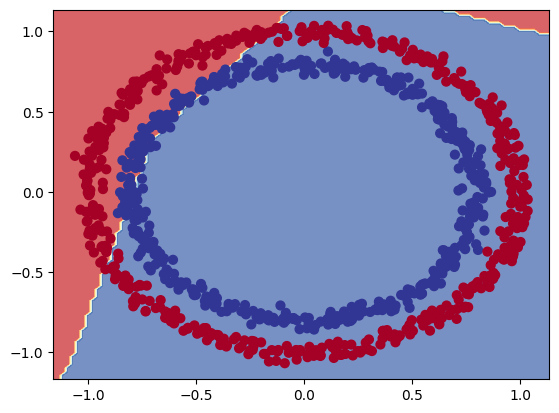

In [34]:
plot_decision_boundary(model_7,x,y)

In [35]:
a=tf.cast(tf.range(-10,10),tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

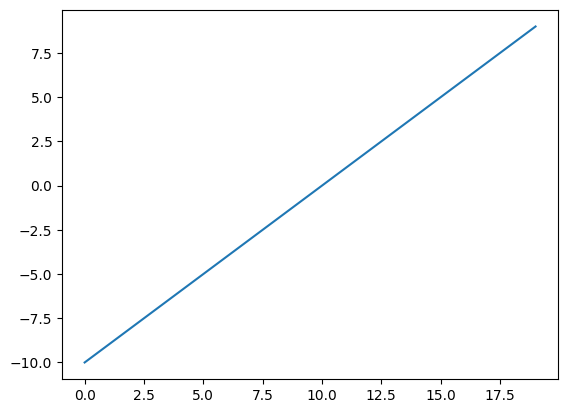

In [36]:
plt.plot(a)

In [37]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))


sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

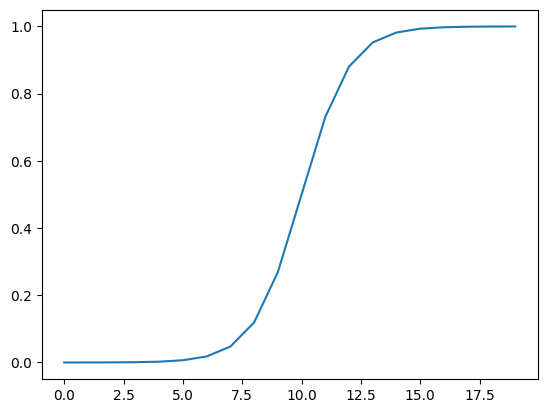

In [38]:
plt.plot(sigmoid(a))

In [39]:
def relu(x):
  return tf.maximum(0,x)

relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

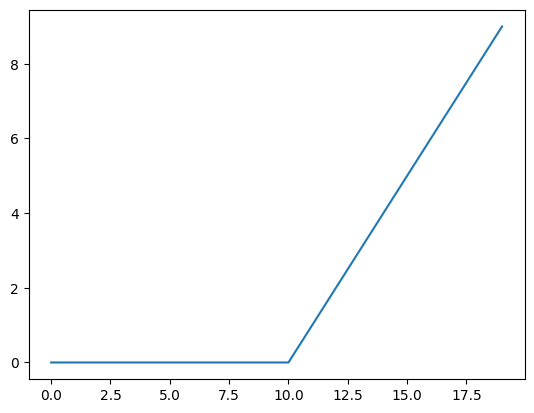

In [40]:
plt.plot(relu(a))

In [41]:
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

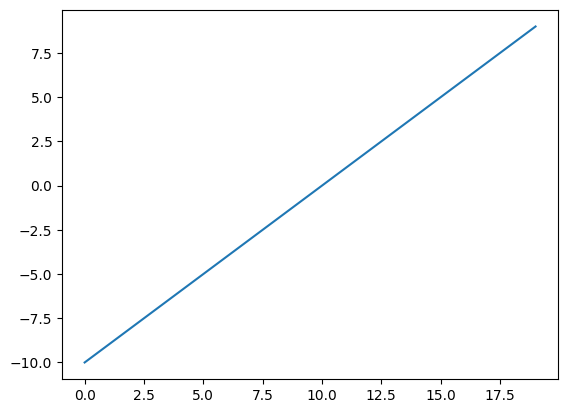

In [42]:
plt.plot(tf.keras.activations.linear(a))

In [43]:
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [44]:
len(x)

1000

In [45]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [46]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history=model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7301 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.4875
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.4712
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4613
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.4212
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4263
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4425
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4575
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.4675
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4787
Epoch 11/25
25/25 [

In [47]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.4050


[0.69263756275177, 0.4050000011920929]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


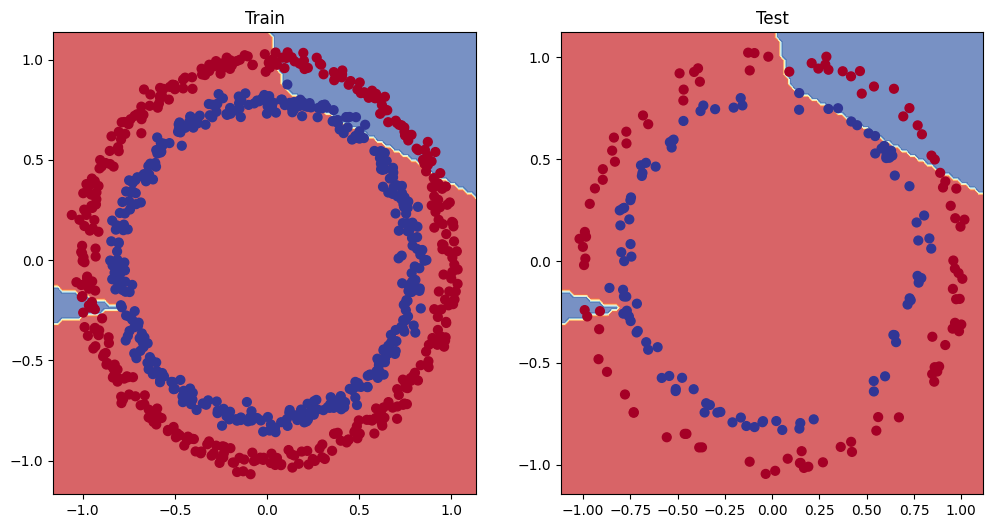

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x=x_test, y=y_test)

In [49]:
history.history

{'loss': [0.7300756573677063,
  0.7218483686447144,
  0.7163307070732117,
  0.7122521996498108,
  0.7094935774803162,
  0.7075355648994446,
  0.7055809497833252,
  0.7043629288673401,
  0.7032111883163452,
  0.7023457884788513,
  0.7016633749008179,
  0.700972318649292,
  0.7003595232963562,
  0.6996971368789673,
  0.6992478370666504,
  0.6985989212989807,
  0.6981355547904968,
  0.6975618004798889,
  0.6970903277397156,
  0.6964102983474731,
  0.6955233812332153,
  0.6946828365325928,
  0.6941507458686829,
  0.6936451196670532,
  0.6931697130203247],
 'accuracy': [0.5012500286102295,
  0.48750001192092896,
  0.4712499976158142,
  0.4612500071525574,
  0.42124998569488525,
  0.42625001072883606,
  0.4424999952316284,
  0.45750001072883606,
  0.4675000011920929,
  0.47874999046325684,
  0.48249998688697815,
  0.48374998569488525,
  0.48500001430511475,
  0.48500001430511475,
  0.48625001311302185,
  0.48124998807907104,
  0.47749999165534973,
  0.4724999964237213,
  0.4675000011920929,


In [50]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.730076,0.50125
1,0.721848,0.48750
2,0.716331,0.47125
3,0.712252,0.46125
4,0.709494,0.42125
5,0.707536,0.42625
6,0.705581,0.44250
7,0.704363,0.45750
8,0.703211,0.46750
9,0.702346,0.47875


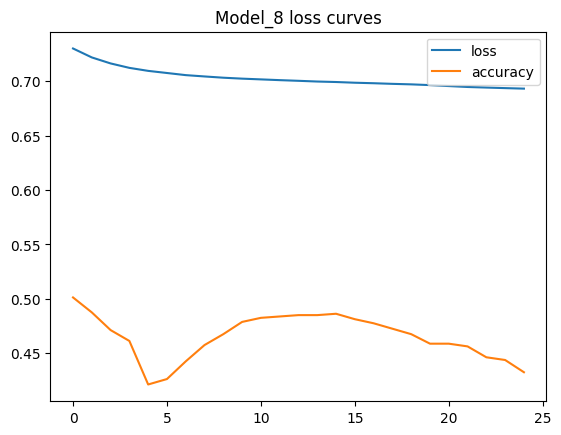

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

In [52]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_9=model_9.fit(x_train, y_train, epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4875 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

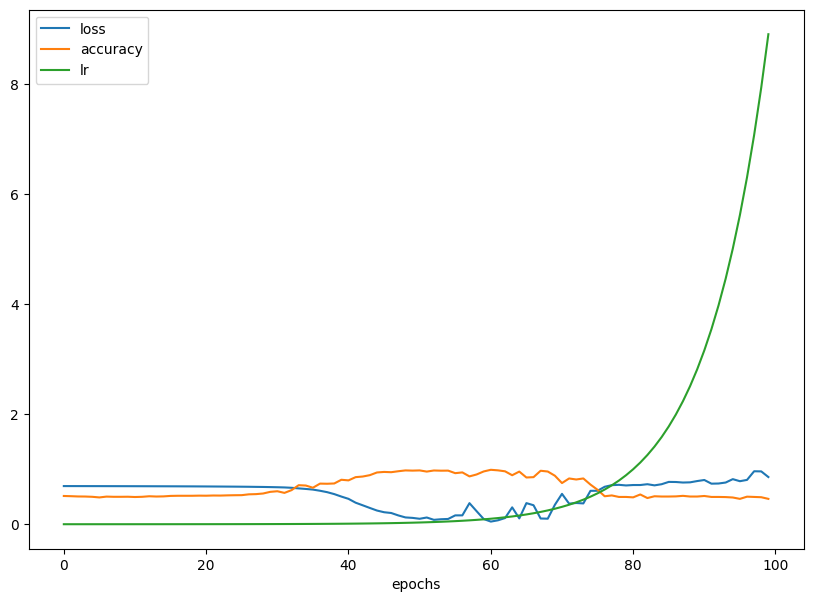

In [53]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

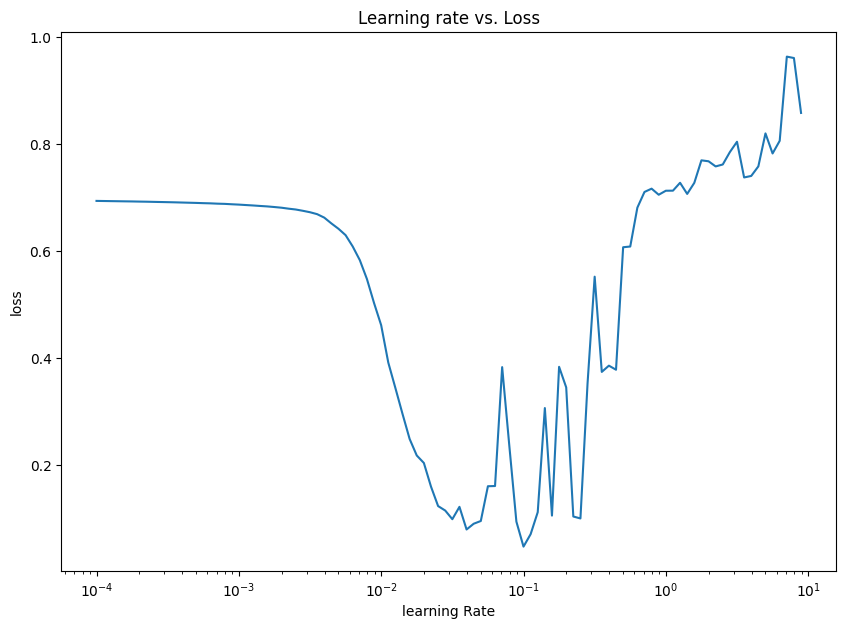

In [54]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs. Loss");

In [55]:
10 ** 0, 10 ** -1, 10 ** -2, 10 ** -3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

history=model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.4988
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5013
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5312
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5525
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5612
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5763
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5888
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6137
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6162
Epoch 11/20
25/25 [

In [57]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6200


[0.6554863452911377, 0.6200000047683716]

In [58]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4050


[0.69263756275177, 0.4050000011920929]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


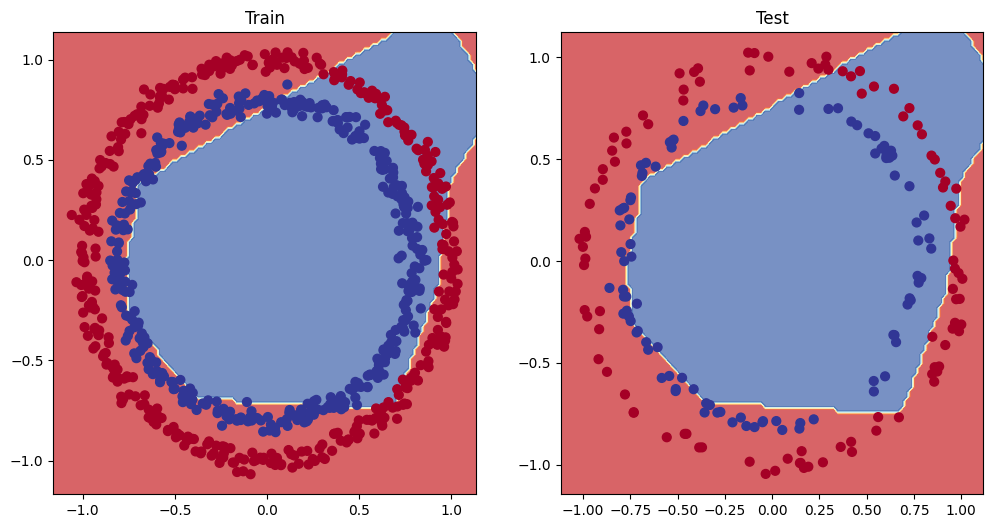

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x=x_test, y=y_test)

In [60]:
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6200
Model loss on the test set : 0.6554863452911377
Model accuracy on the test set: 62.00%


In [61]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)


7/7 [==============================] - 0s 2ms/step


In [62]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.5666583 ],
        [0.5323336 ],
        [0.5542937 ],
        [0.49140266],
        [0.5363935 ],
        [0.43348286],
        [0.48301122],
        [0.41907609],
        [0.5344131 ],
        [0.5231882 ]], dtype=float32))

In [63]:
tf.round(y_preds)[:10]



<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [64]:
confusion_matrix(y_test, tf.round(y_preds))

array([[83, 18],
       [58, 41]])

TypeError: 'builtin_function_or_method' object is not subscriptable

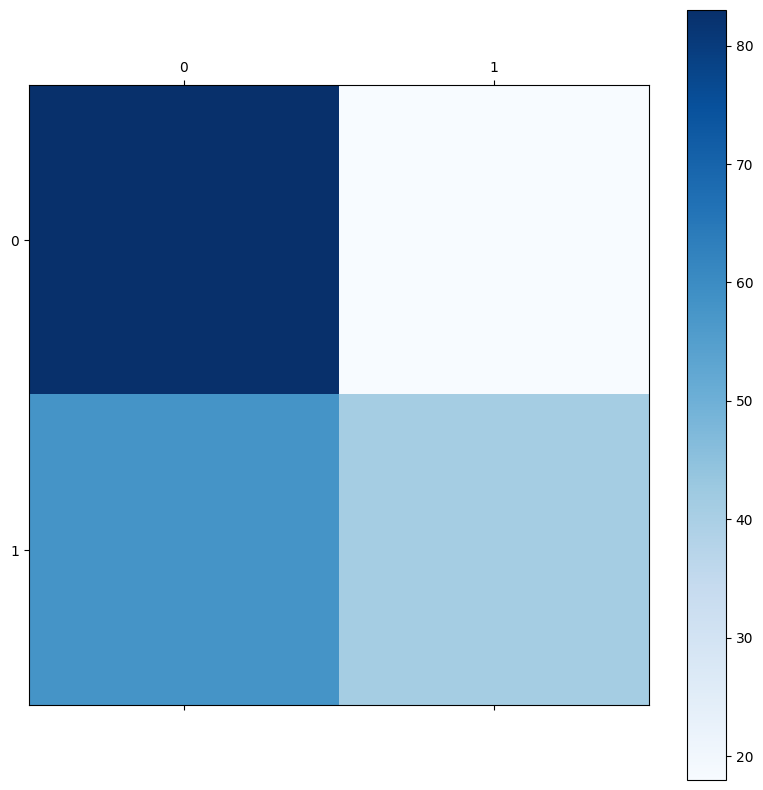

In [65]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)


classes = False

if classes:
  labels = classes
else:
  labels = np.arange[cm.shape[0]]


ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalaligment="center",
           color="white" if cm[i, j]> threshold else "black",
           size=15)

In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [67]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [68]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

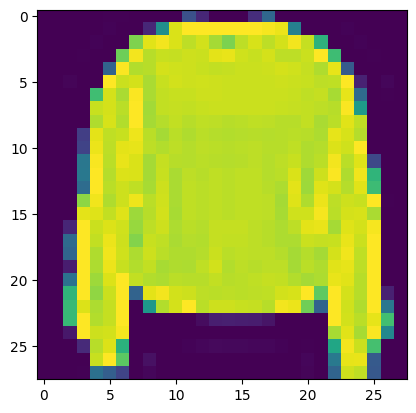

In [69]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [70]:
train_labels[7]

2

In [71]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

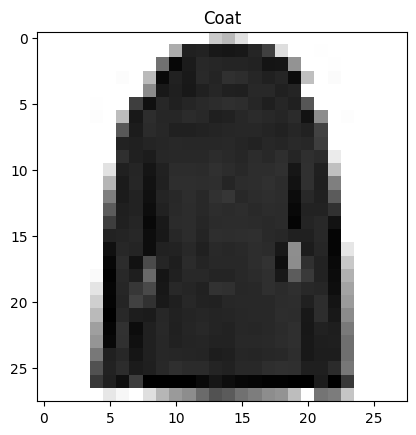

In [72]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

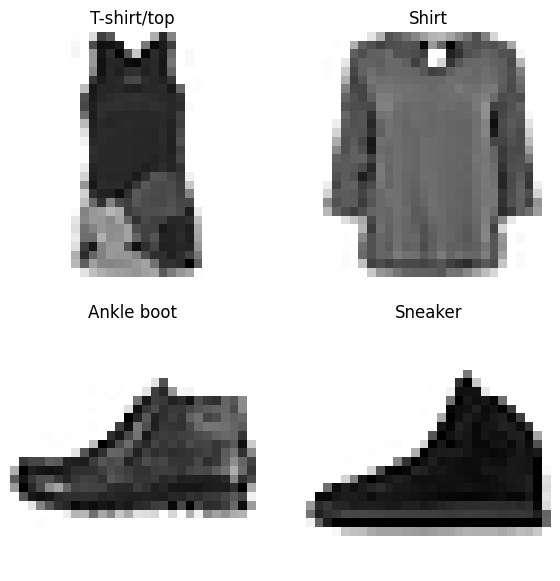

In [73]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [74]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [75]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),

])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9390 - accuracy: 0.2215 - val_loss: 1.7294 - val_accuracy: 0.2733
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6975 - accuracy: 0.2735 - val_loss: 1.6667 - val_accuracy: 0.2744
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6479 - accuracy: 0.2908 - val_loss: 1.6242 - val_accuracy: 0.3007
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6259 - accuracy: 0.3005 - val_loss: 1.6179 - val_accuracy: 0.3104
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6171 - accuracy: 0.3000 - val_loss: 1.6083 - val_accuracy: 0.3046
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6090 - accuracy: 0.3069 - val_loss: 1.5997 - val_accuracy: 0.3151
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6065 - accuracy: 0.3070 - val_loss: 1.5932 - val_accuracy:

In [76]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
train_data.min(), train_data.max()

(0, 255)

In [78]:
train_data_norm  = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [79]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4236 - accuracy: 0.4480 - val_loss: 0.9949 - val_accuracy: 0.6139
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8906 - accuracy: 0.6688 - val_loss: 0.8527 - val_accuracy: 0.6784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7948 - accuracy: 0.6973 - val_loss: 0.7998 - val_accuracy: 0.6956
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7462 - accuracy: 0.7097 - val_loss: 0.7060 - val_accuracy: 0.7344
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6472 - accuracy: 0.7615 - val_loss: 0.6624 - val_accuracy: 0.7574
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6120 - accuracy: 0.7786 - val_loss: 0.6531 - val_accuracy: 0.7725
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5958 - accuracy: 0.7867 - val_loss: 0.6350 - val_accuracy

<Axes: title={'center': 'Normalized data'}>

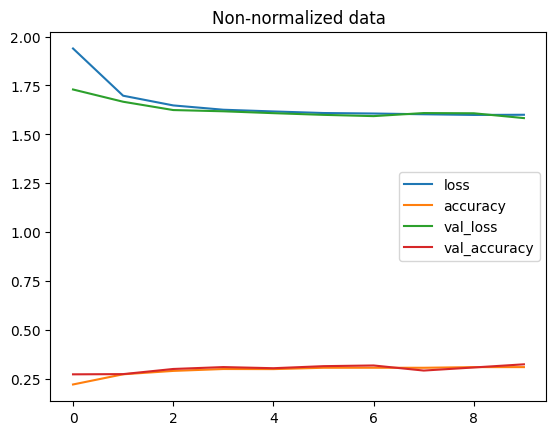

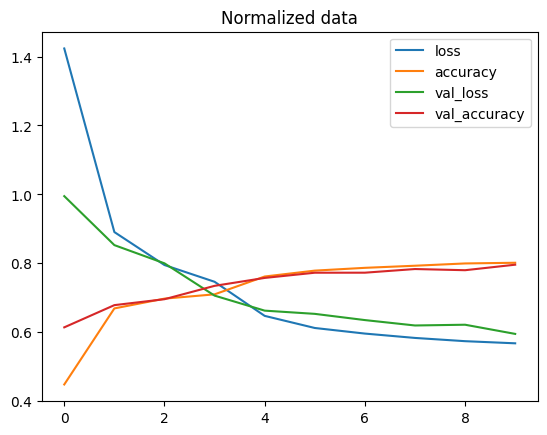

In [80]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [81]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4355 - accuracy: 0.4588 - val_loss: 1.0749 - val_accuracy: 0.5745 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9678 - accuracy: 0.6105 - val_loss: 0.8239 - val_accuracy: 0.7030 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7050 - accuracy: 0.7335 - val_loss: 0.6708 - val_accuracy: 0.7345 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6342 - accuracy: 0.7460 - val_loss: 0.6329 - val_accuracy: 0.7449 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6095 - accuracy: 0.7537 - val_loss: 0.6321 - val_accuracy: 0.7560 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5866 - accuracy: 0.7742 - val_loss: 0.5975 - val_accuracy: 0.7687 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'finding the ideal learning rate')

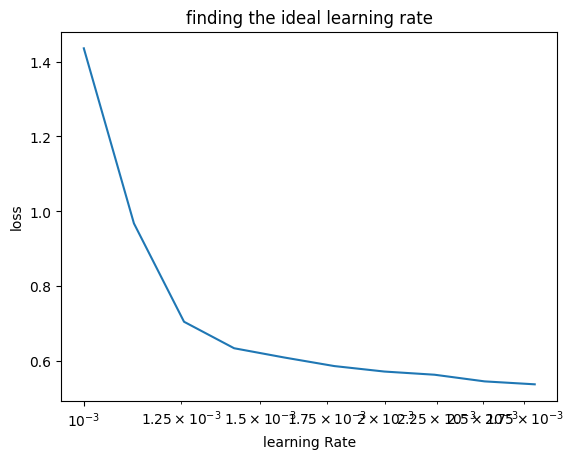

In [82]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs[:10], find_lr_history.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

In [83]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

history_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5477 - accuracy: 0.3772 - val_loss: 1.3540 - val_accuracy: 0.4329
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2326 - accuracy: 0.5070 - val_loss: 1.1147 - val_accuracy: 0.5700
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0173 - accuracy: 0.5950 - val_loss: 0.9925 - val_accuracy: 0.5935
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9318 - accuracy: 0.6181 - val_loss: 0.9176 - val_accuracy: 0.6236
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8923 - accuracy: 0.6325 - val_loss: 0.8931 - val_accuracy: 0.6429
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8693 - accuracy: 0.6407 - val_loss: 0.8829 - val_accuracy: 0.6457
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8534 - accuracy: 0.6531 - val_loss: 0.8702 - val_accuracy:

In [1]:
import itertools
from sklearn.metrics  import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  #classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange[cm.shape[0]]


  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="true label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min())/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalaligment="center",
             color="white" if cm[i, j]> threshold else "black",
             size=15)

In [84]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [86]:
y_probs = model_14.predict(test_data)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.2389693e-02, 4.5902540e-05, 5.4824259e-04, 9.6724398e-04,
        1.6507266e-04, 3.0437658e-02, 4.4797985e-03, 3.7350586e-01,
        5.2153179e-03, 5.7224518e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [87]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [89]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.2389693e-02, 4.5902540e-05, 5.4824259e-04, 9.6724398e-04,
        1.6507266e-04, 3.0437658e-02, 4.4797985e-03, 3.7350586e-01,
        5.2153179e-03, 5.7224518e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [90]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 4, 1, 1, 4, 1, 4, 4, 9, 9])

In [91]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[  0, 443,   4,  31, 516,   0,   0,   0,   0,   6],
       [  0, 972,   0,   2,  25,   0,   0,   0,   0,   1],
       [  0,  27,   0,   0, 972,   0,   0,   0,   0,   1],
       [  0, 530,   1, 362, 103,   0,   0,   0,   0,   4],
       [  0,  55,   0,   0, 945,   0,   0,   0,   0,   0],
       [  0,   1,  19, 259,  14,   4,   0,   0,   4, 699],
       [  0, 140,   3,   8, 842,   0,   0,   0,   0,   7],
       [  0,   0,   1,   0,   0,   0,   0,   0,   1, 998],
       [  0,   5,   7,   2, 968,   0,   0,   0,   3,  15],
       [  0,   0,   0,   2,   1,   1,   0,   0,   0, 996]])

AttributeError: 'Text' object has no property 'horizontalaligment'

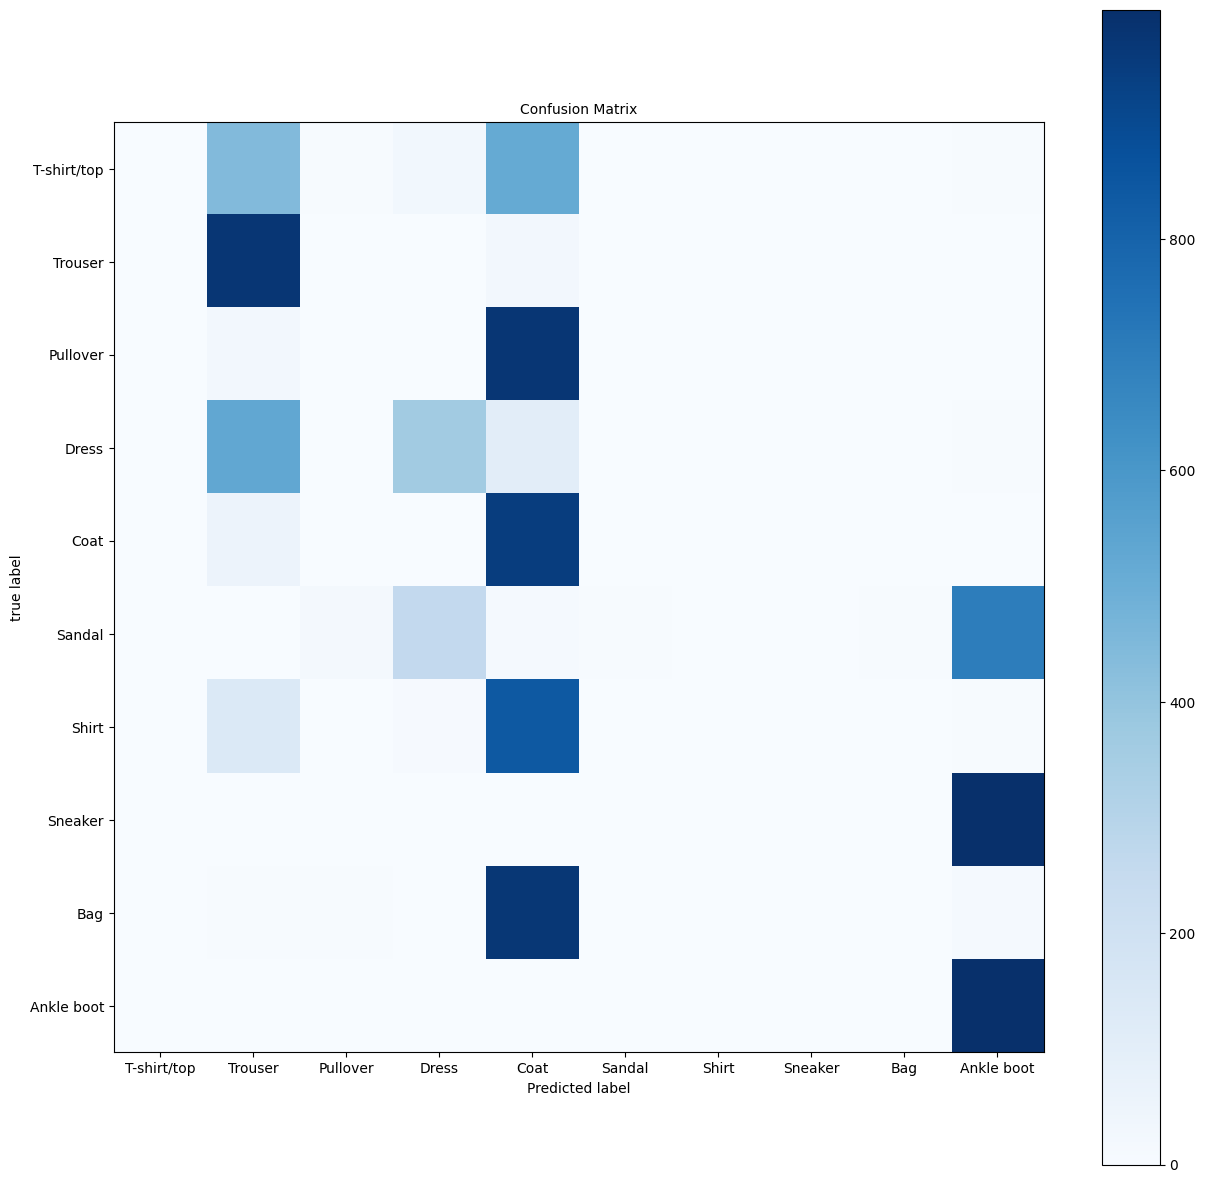

In [94]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)


In [95]:
import random

def plot_random_image(model, images, true_labels, classes):
  i=random.randint(0, len(images))

  target_image=images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


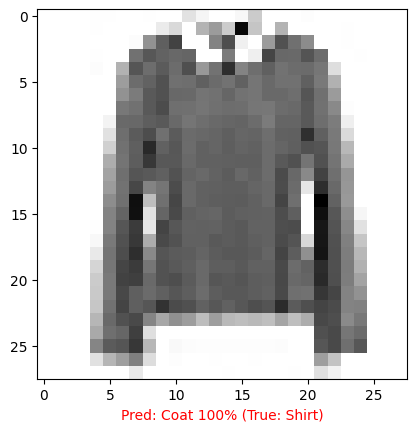

In [100]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [101]:
model_14.layers

In [102]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.0298034 ,  0.21489175,  0.03627652, -0.02300211],
        [-0.03900928,  0.43844998,  0.01289632, -0.37242422],
        [-0.05930656,  0.3985838 , -0.00666424, -0.10583415],
        ...,
        [-0.05415386,  0.21897253,  0.02134961,  0.00502994],
        [-0.02293241,  0.30631435, -0.0841312 , -0.11939297],
        [-0.01362456,  0.04470737,  0.01582712,  0.13099506]],
       dtype=float32),
 (784, 4))

In [103]:
biases, biases.shape

(array([-0.03888819,  2.115174  , -0.02729713,  1.0871054 ], dtype=float32),
 (4,))

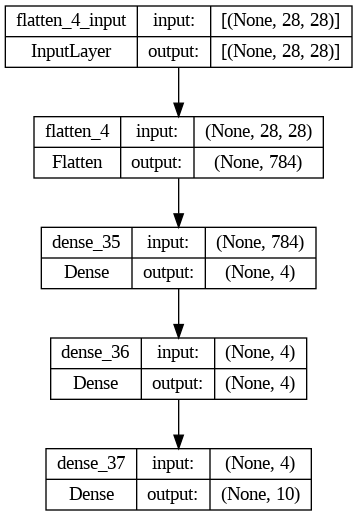

In [104]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)